In [13]:
#Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [4]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [5]:
# Checking null values
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [9]:
# Cleaning data
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.593210
std,43.151882,14.711588,16.471618,267.291955
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.400000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


          Duration     Pulse  Maxpulse  Calories
Duration  1.000000 -0.162098  0.003578  0.922754
Pulse    -0.162098  1.000000  0.787035  0.018594
Maxpulse  0.003578  0.787035  1.000000  0.196884
Calories  0.922754  0.018594  0.196884  1.000000


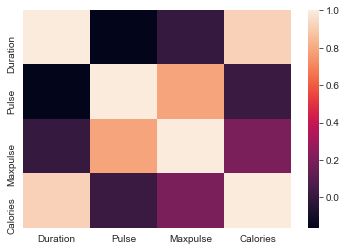

In [14]:
# Correlation between variables
sns.set_style("whitegrid")
corr = df.corr()
print(corr)

# Visualisation of correlation matrix
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [ ]:
# We found that there is a high coleration between "Duration" and "Calories"

In [15]:
# Correlation coefficient
corr_coef = np.corrcoef(df["Duration"], df["Calories"])[0, 1]
print("Correlation between Duration and Calories:", round(corr_coef, 2))

Correlation between Duration and Calories: 0.92


In [16]:
# Significance of correlation coefficient
ttest, pval = stats.ttest_ind(df["Duration"], df["Calories"])
print("Independent t-test:", ttest, pval)

Independent t-test: -14.732537922067946 6.547333990685293e-38


Text(0.5, 1.0, 'Independent T-Test')

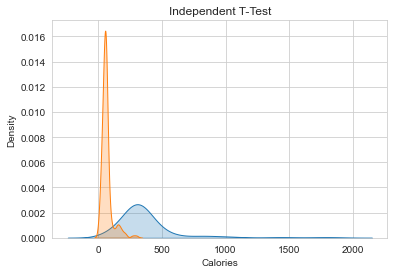

In [17]:
sns.kdeplot(df["Calories"], shade=True)
sns.kdeplot(df["Duration"], shade=True)
plt.title("Independent T-Test")

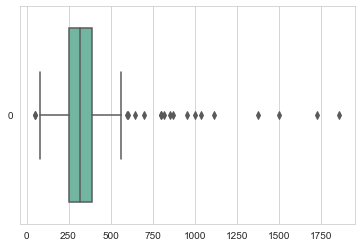

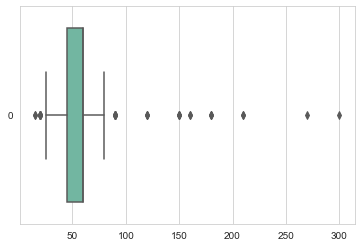

In [20]:
# Visualizing data distribution
calories = df["Calories"]
duration = df["Duration"]

ax = sns.boxplot(data=calories, orient="h", palette="Set2")
plt.show()
ax = sns.boxplot(data=duration, orient="h", palette="Set2")
plt.show()

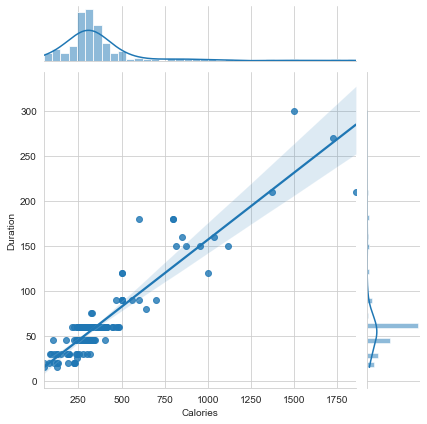

In [21]:
# Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="Calories", y="Duration", data=df)
plt.show()

[8.34006357]
[[0.14853504]]


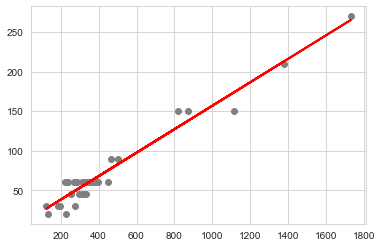

In [22]:
#Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X = df['Calories'].values.reshape(-1,1)
y = df['Duration'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor=LinearRegression()
regressor.fit(X_train, y_train)

# Retrieve the intercept:
print(regressor.intercept_)
# Retrieving the slope:
print(regressor.coef_)
# Prediction
y_pred = regressor.predict(X_test)

# Visualization
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()